In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
bbm = pd.read_csv("./SD_analysis_bbm-bnet-inputs-random.csv")
bbm_agg = bbm.copy()
bbm_agg["name"] = bbm_agg["name"].apply(lambda x: x.split("_")[0])
bbm_agg = bbm_agg.groupby("name").mean().reset_index()

In [3]:
# make each bbm model have 128 samples of source combinations
bbm_counts = bbm["name"].apply(lambda x: x.split("_")[0]).value_counts().to_dict()

for name in bbm_counts:
    if bbm_counts[name] < 128:
        number_of_extra_copies = int(128 / bbm_counts[name] - 1)

        array = bbm[bbm["name"].str.startswith(name)] 
        array_128 = pd.concat([array] * number_of_extra_copies)

        bbm = pd.concat([bbm, array_128])

bbm.sort_index(inplace=True)
bbm.reset_index(inplace=True)

In [4]:
casq_list = [str(x) for x in range(111, 133)]
casq_list.extend([str(x) for x in range(213, 220)])

casq = bbm.loc[bbm["name"].apply(lambda x: x.split("_")[0]).isin(casq_list)].copy()
casq_agg = bbm_agg.loc[bbm_agg["name"].isin(casq_list)].copy()

noncasq = bbm.loc[~bbm["name"].apply(lambda x: x.split("_")[0]).isin(casq_list)].copy()
noncasq_agg = bbm_agg.loc[~bbm_agg["name"].isin(casq_list)].copy()

In [5]:
bbm.head()

,index,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
0,0,001_0000000000011111000,321,1.0,0.0,1.0,1.0,0.0
1,1,001_0000001000011000011,321,1.0,0.0,1.0,1.0,0.0
2,2,001_0000001000110110001,321,1.0,0.0,1.0,1.0,0.0
3,3,001_0000010000000111100,321,1.0,0.0,1.0,1.0,0.0
4,4,001_0000010011101011100,321,1.0,0.0,1.0,1.0,0.0


In [6]:
bbm_agg.head()

,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
0,001,321.0,1.031250,0.015625,1.015625,1.015625,0.0
1,002,139.0,33752.298246,NaN,312.619469,312.619469,0.0
2,003,20.0,2.000000,0.500000,1.500000,1.500000,0.0
3,004,247.0,NaN,NaN,NaN,NaN,NaN
4,005,28.0,7.000000,4.000000,1.000000,1.000000,0.0


In [7]:
casq.head()

,index,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
14080,5757,111_000000010110001,33,1.0,0.0,1.0,1.0,0.0
14081,5758,111_000000111010010,33,1.0,0.0,1.0,1.0,0.0
14082,5759,111_000011100101110,33,1.0,0.0,1.0,1.0,0.0
14083,5760,111_000011101100001,33,1.0,0.0,1.0,1.0,0.0
14084,5761,111_000100000010101,33,1.0,0.0,1.0,1.0,0.0


In [8]:
casq_agg.head()

,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
110,111,33.0,1.000000,0.000000,1.000000,1.000000,0.0
111,112,112.0,1.015625,0.007812,1.007812,1.007812,0.0
112,113,182.0,275.250000,4.757812,27.539062,27.539062,0.0
113,114,84.0,40.781250,3.171875,8.671875,8.671875,0.0
114,115,35.0,4.812500,0.875000,2.250000,2.250000,0.0


In [9]:
noncasq.head()

,index,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
0,0,001_0000000000011111000,321,1.0,0.0,1.0,1.0,0.0
1,1,001_0000001000011000011,321,1.0,0.0,1.0,1.0,0.0
2,2,001_0000001000110110001,321,1.0,0.0,1.0,1.0,0.0
3,3,001_0000010000000111100,321,1.0,0.0,1.0,1.0,0.0
4,4,001_0000010011101011100,321,1.0,0.0,1.0,1.0,0.0


In [10]:
noncasq_agg.head()

,name,N,sd size,depth,minimal trapspaces,attractors,motif-avoidant-attractors
0,001,321.0,1.031250,0.015625,1.015625,1.015625,0.0
1,002,139.0,33752.298246,NaN,312.619469,312.619469,0.0
2,003,20.0,2.000000,0.500000,1.500000,1.500000,0.0
3,004,247.0,NaN,NaN,NaN,NaN,NaN
4,005,28.0,7.000000,4.000000,1.000000,1.000000,0.0


In [11]:
frames = {
    "non-casq (Fixed)": noncasq,
    "casq (Fixed)": casq,
    "non-casq (Aggregate)": noncasq_agg,
    "casq (Aggregate)": casq_agg,
}
network_type_colors = {
    "non-casq (Fixed)": "#ee6677",
    "casq (Fixed)": "#66ccee",
    "non-casq (Aggregate)": "#aa3377",
    "casq (Aggregate)": "#4477aa",
}

In [12]:
bins = np.log2(sorted([8, 16, 32, 64, 128, 256, 512]))
lbins = bins - 0.5
rbins = bins + 0.5
nbins = len(bins)
bins

array([3., 4., 5., 6., 7., 8., 9.])

In [13]:
for name, df in frames.items():
    df["bin"] = np.digitize(np.log2(df["N"]), bins)
    df["network_id"] = df["name"].apply(lambda x: x.split("_")[0])

In [14]:
{
    name: pd.merge(df.groupby("bin")["N"].min(), df.groupby("bin")["N"].max(), on="bin")
    for name, df in frames.items()
}

{'non-casq (Fixed)':      N_x  N_y
 bin          
 0      5    7
 1      8   15
 2     16   31
 3     32   62
 4     65  118
 5    128  247
 6    317  342,
 'casq (Fixed)':      N_x  N_y
 bin          
 2     19   21
 3     33   60
 4     65  121
 5    144  252,
 'non-casq (Aggregate)':        N_x    N_y
 bin              
 0      5.0    7.0
 1      8.0   15.0
 2     16.0   31.0
 3     32.0   62.0
 4     65.0  118.0
 5    128.0  247.0
 6    317.0  342.0,
 'casq (Aggregate)':        N_x    N_y
 bin              
 2     19.0   21.0
 3     33.0   60.0
 4     65.0  121.0
 5    144.0  252.0}

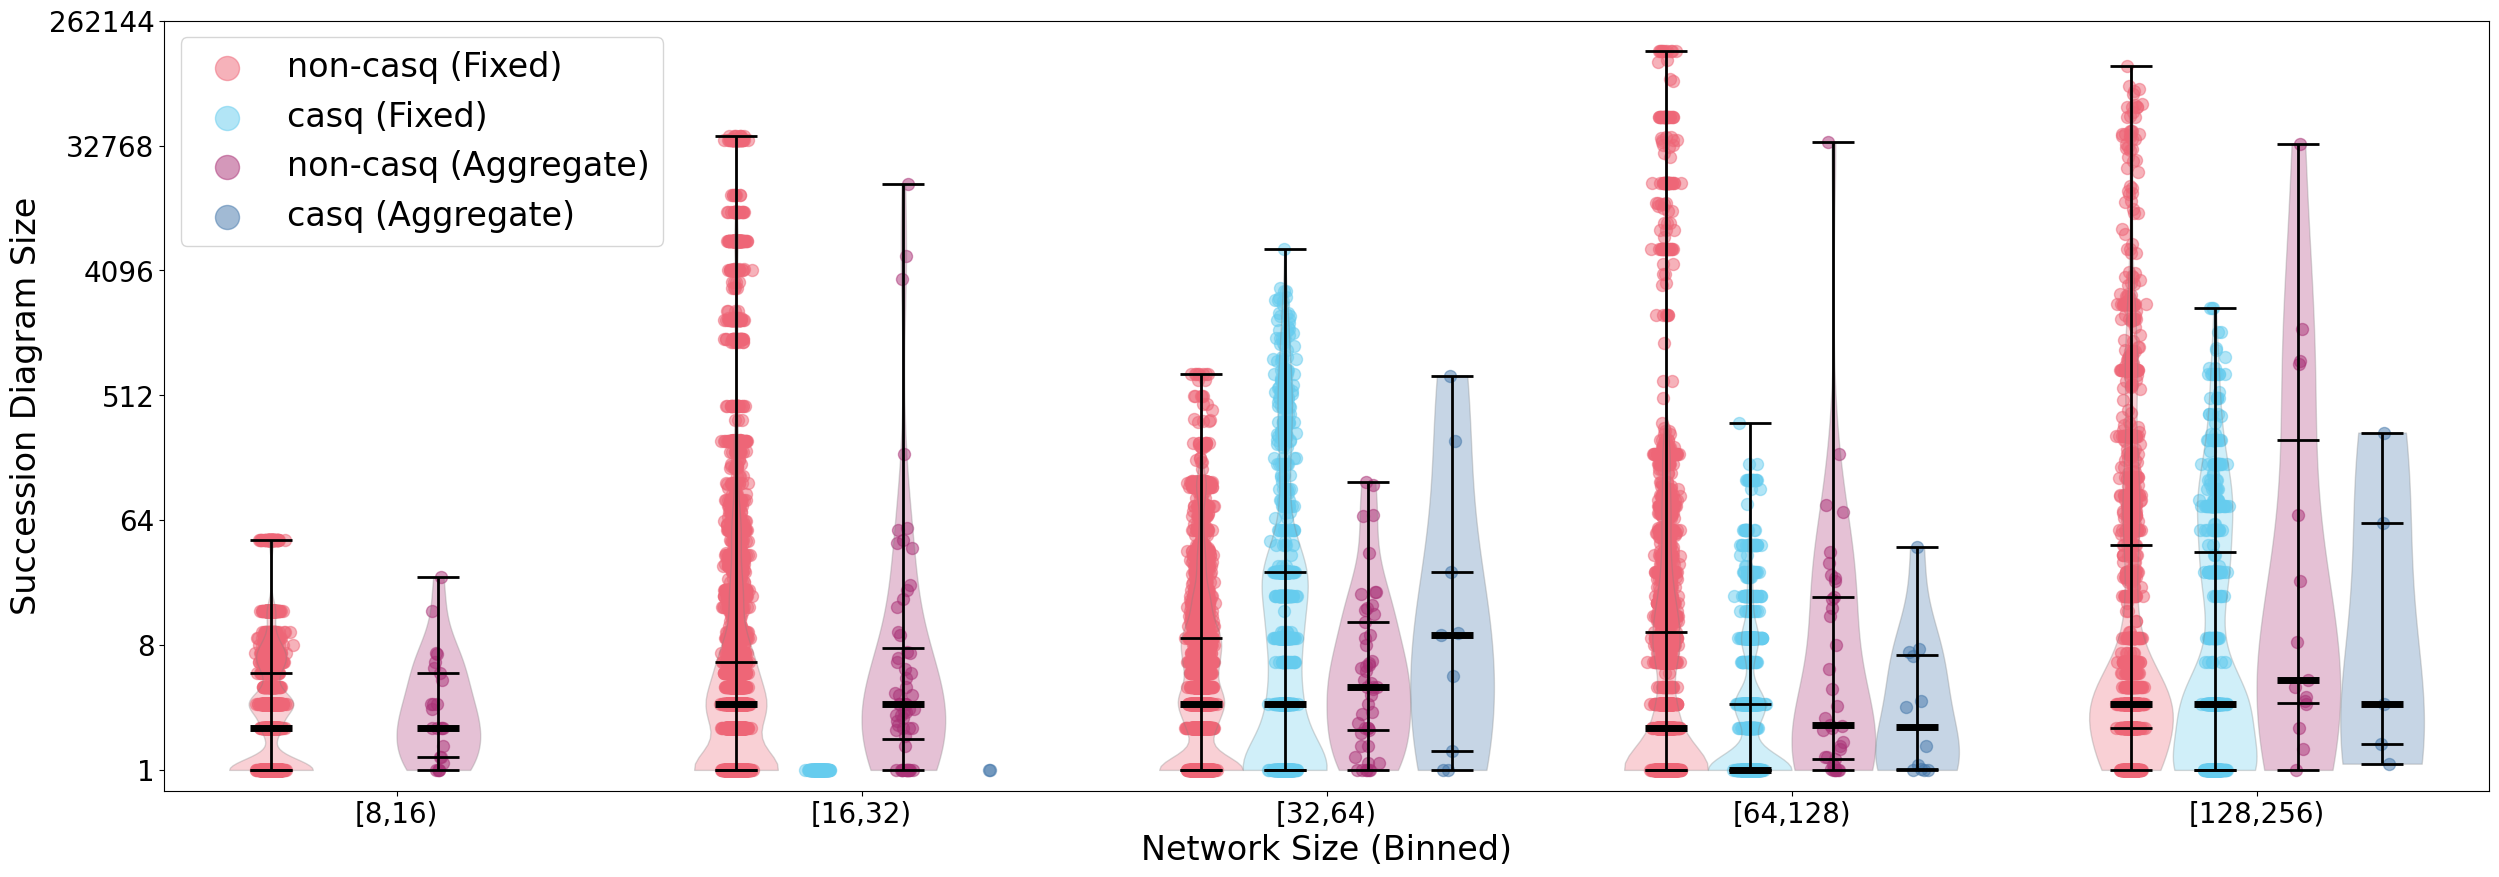

In [15]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
hscale = 0.18
for name_pos, (name, df) in enumerate(frames.items()):
    for bin in range(nbins + 1):
        arr = np.log2(
            df["sd size"][(df["bin"] == bin) & (df["N"] >= 4) & (df["N"] < 512)]
        )
        arr = arr[~np.isnan(arr)]
        ax.scatter(
            bin + (name_pos - 1.5) * hscale + np.random.normal(0, 0.01, len(arr)),
            arr,
            alpha=0.5,
            color=network_type_colors[name],
            label=name if bin == 0 else None,
            s=75,
        )
        if len(set(arr)) > 4:
            vp = ax.violinplot(
                arr,
                [bin + (name_pos - 1.5) * hscale],
                widths=hscale,
                quantiles=[0.25, 0.75],
                showmedians=True,
            )
            for partname in vp:
                if partname == "bodies":
                    continue
                vp[partname].set_edgecolor("black")
                vp[partname].set_linewidth(2)

            vp["cmedians"].set_linewidth(5)
            # vp["cmeans"].set_color("red")

            for body in vp["bodies"]:
                body.set_facecolor(network_type_colors[name])
                body.set_edgecolor("grey")
                body.set_alpha(0.3)

ax.legend(fontsize=24, markerscale=2, loc="upper left")

ax.set_xlabel("Network Size (Binned)", fontsize=24)
ax.set_ylabel("Succession Diagram Size", fontsize=24)
xticks = ax.get_xticks().tolist()
ax.set_xticks(xticks)
ax.set_xticklabels([f"[{round(2**(x+2))},{round(2**(x+3))})" for x in xticks])
# ax.set_xlim(-0.5, 6.5)
ax.set_xlim(0.5, 5.5)

# yticks = ax.get_yticks().tolist()
yticks = [0, 3, 6, 9, 12, 15, 18]
ax.set_yticks(yticks)
ax.set_yticklabels([f"{round(2**x)}" for x in yticks])
ax.set_ylim(-0.5, 18)

ax.tick_params(labelsize=20)
fig.savefig("figures/sd_size_casq_compare.png", bbox_inches="tight")

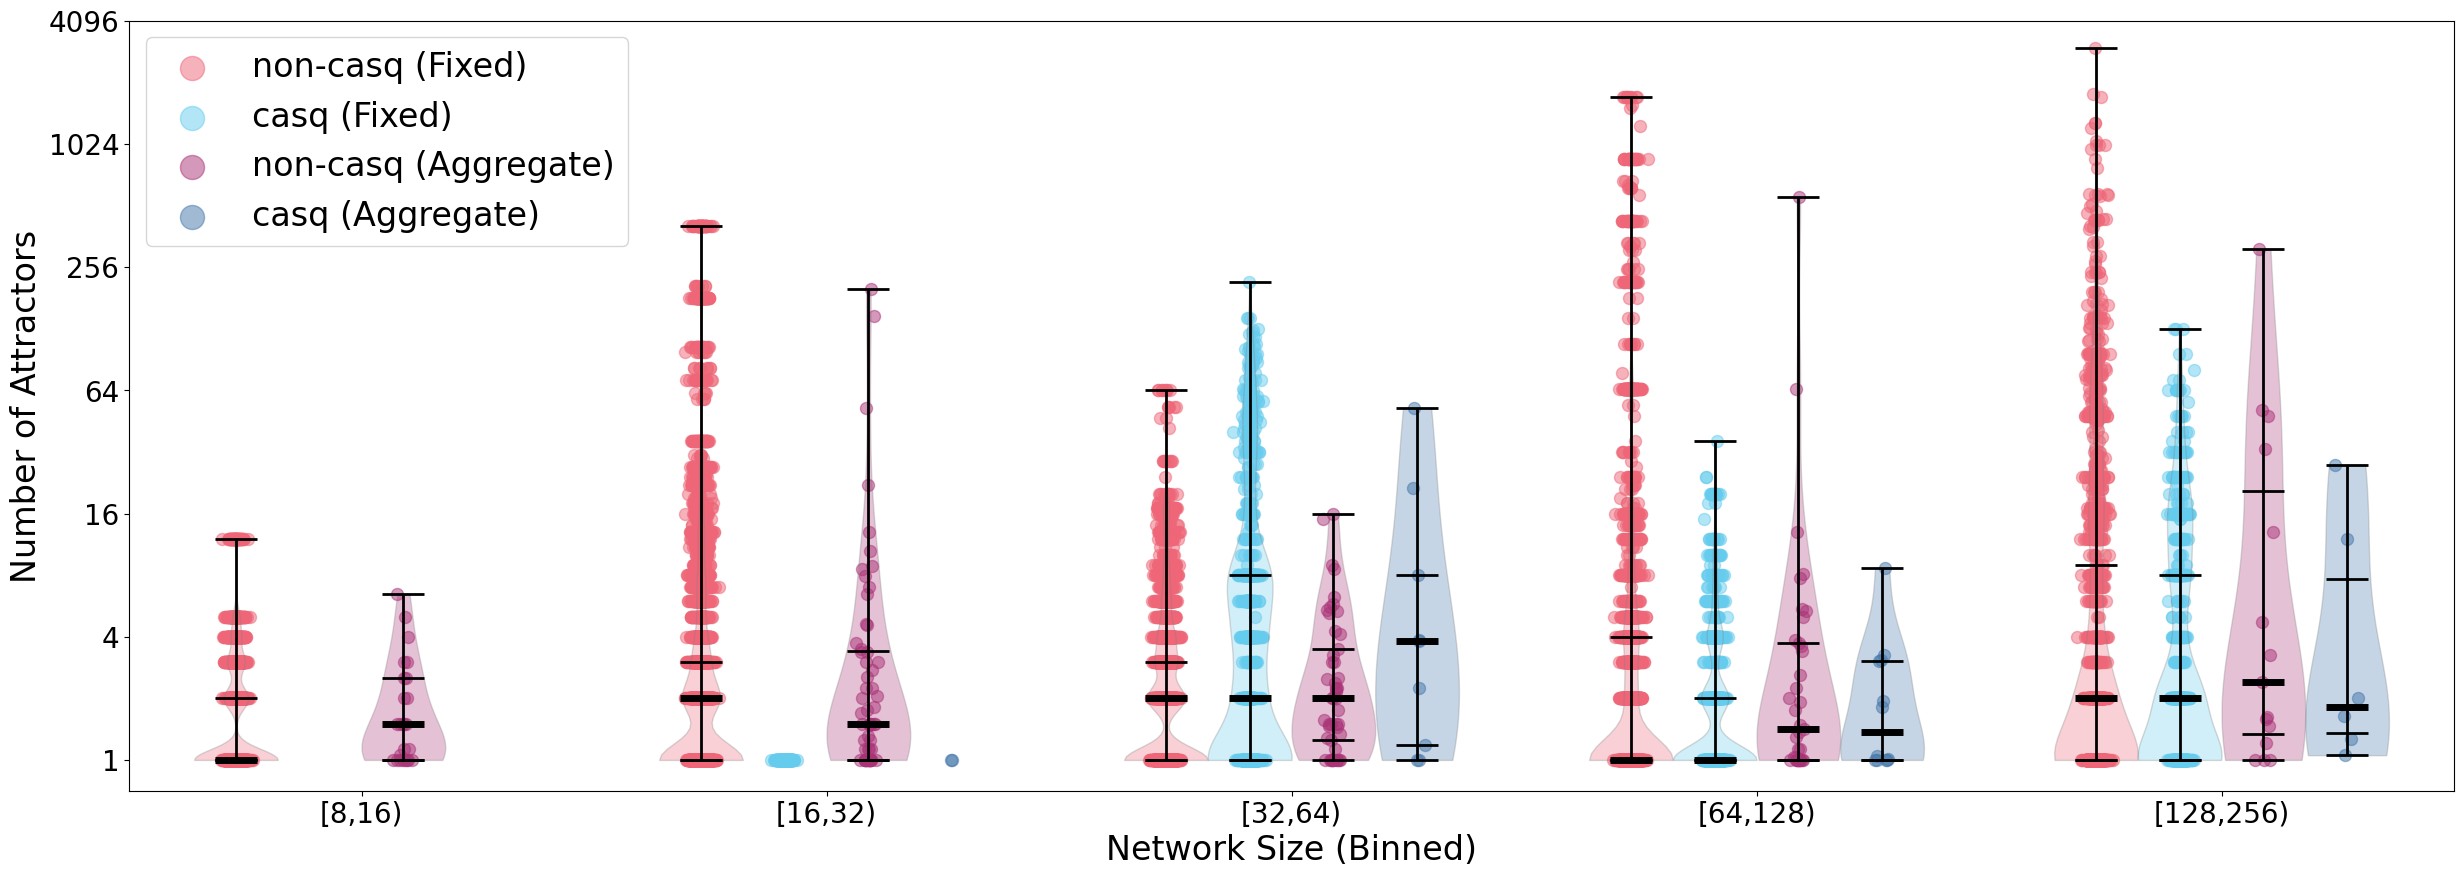

In [16]:
fig, ax = plt.subplots(1, 1, figsize=(30, 10))
hscale = 0.18
for name_pos, (name, df) in enumerate(frames.items()):
    for bin in range(nbins + 1):
        arr = np.log2(
            # df["sd size"][(df["bin"] == bin) & (df["N"] >= 0) & (df["N"] < 640)]
            df["attractors"][(df["bin"] == bin) & (df["N"] >= 4) & (df["N"] < 512)]
        )
        arr = arr[~np.isnan(arr)]
        ax.scatter(
            bin + (name_pos - 1.5) * hscale + np.random.normal(0, 0.01, len(arr)),
            arr,
            alpha=0.5,
            color=network_type_colors[name],
            label=name if bin == 0 else None,
            s=75,
        )
        if len(set(arr)) > 4:
            vp = ax.violinplot(
                arr,
                [bin + (name_pos - 1.5) * hscale],
                widths=hscale,
                quantiles=[0.25, 0.75],
                showmedians=True,
            )
            for partname in vp:
                if partname == "bodies":
                    continue
                vp[partname].set_edgecolor("black")
                vp[partname].set_linewidth(2)

            vp["cmedians"].set_linewidth(5)
            # vp["cmeans"].set_color("red")

            for body in vp["bodies"]:
                body.set_facecolor(network_type_colors[name])
                body.set_edgecolor("grey")
                body.set_alpha(0.3)

ax.legend(fontsize=24, markerscale=2, loc="upper left")

ax.set_xlabel("Network Size (Binned)", fontsize=24)
ax.set_ylabel("Number of Attractors", fontsize=24)
xticks = ax.get_xticks().tolist()
ax.set_xticks(xticks)
ax.set_xticklabels([f"[{round(2**(x+2))},{round(2**(x+3))})" for x in xticks])
# ax.set_xlim(-0.5, 6.5)
ax.set_xlim(0.5, 5.5)

yticks = ax.get_yticks().tolist()
ax.set_yticks(yticks)
ax.set_yticklabels([f"{round(2**x)}" for x in yticks])
ax.set_ylim(-0.5, 12)

ax.tick_params(labelsize=20)
fig.savefig("figures/attractor_scale_casq_compare.png", bbox_inches="tight")